In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

linear_df = pd.read_csv('/Users/muthuraj/Downloads/muthuraj-models(gb,knn)/Linear.csv')

features = linear_df.drop(columns=['DATE','GDP'])
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.7, random_state=42
)


In [3]:

gradient_boosting = GradientBoostingRegressor(random_state=42)
knn = KNeighborsRegressor()


gradient_boosting.fit(X_train, y_train)
knn.fit(X_train, y_train)


gb_prediction = gradient_boosting.predict(X_test)
knn_prediction = knn.predict(X_test)


gb_r2 = r2_score(y_test, gb_prediction)
knn_r2 = r2_score(y_test, knn_prediction)


gb_mse = mean_squared_error(y_test, gb_prediction)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_prediction)


knn_mse = mean_squared_error(y_test, knn_prediction)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_prediction)


print(f"Gradient Boosting Evaluation on Test Set:")
print(f"R²: {gb_r2:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"RMSE: {gb_rmse:.4f}")
print(f"MAE: {gb_mae:.4f}")


print(f"KNN Evaluation on Test Set:")
print(f"R²: {knn_r2:.4f}")
print(f"MSE: {knn_mse:.4f}")
print(f"RMSE: {knn_rmse:.4f}")
print(f"MAE: {knn_mae:.4f}")

Gradient Boosting Evaluation on Test Set:
R²: 0.9999
MSE: 2980.1190
RMSE: 54.5905
MAE: 38.3567
KNN Evaluation on Test Set:
R²: 0.9999
MSE: 4134.1430
RMSE: 64.2973
MAE: 27.8825


In [4]:
#cross validation 
cross_validation_score_gb = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='r2')
cross_validation_score_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')

print(f"Gradient boosting cross validation scores for R^2: {cross_validation_score_gb}")
print(f"gb mean cross validation score R^2: {cross_validation_score_gb.mean():.4f}")

print(f"knn cross validation scores for R^2: {cross_validation_score_knn}")
print(f"knn mean cross validation score R^2: {cross_validation_score_knn.mean():.4f}")

Gradient boosting cross validation scores for R^2: [0.99994178 0.99994397 0.99994015 0.99994988 0.99994704]
gb mean cross validation score R^2: 0.9999
knn cross validation scores for R^2: [0.9997059  0.99991646 0.99985982 0.9999255  0.99989434]
knn mean cross validation score R^2: 0.9999


In [5]:
gb_mape = mean_absolute_percentage_error(y_test, gb_prediction) 
gb_accuracy = 100 * (1 - gb_mape) 


knn_mape = mean_absolute_percentage_error(y_test, knn_prediction)
knn_accuracy = 100 * (1 - knn_mape) 

print(f"Accuracy (MAPE): {gb_accuracy:.2f}%")
print(f"Accuracy (MAPE): {knn_accuracy:.2f}%")

Accuracy (MAPE): 99.38%
Accuracy (MAPE): 99.60%


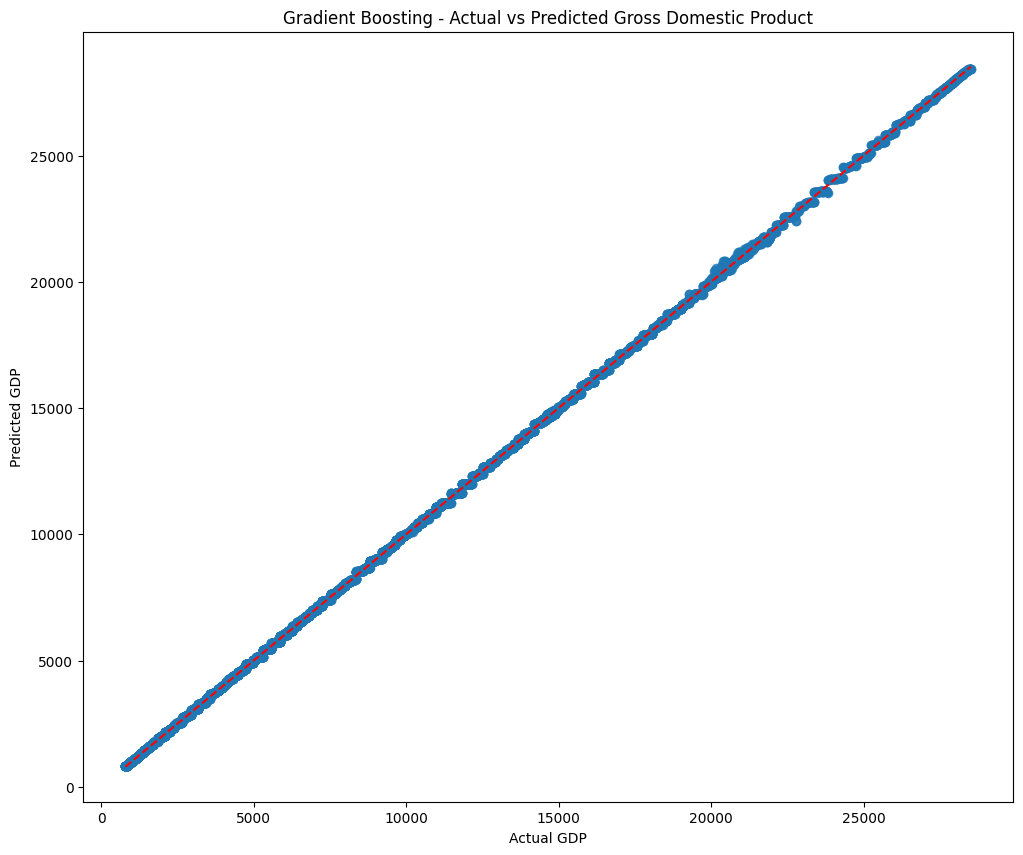

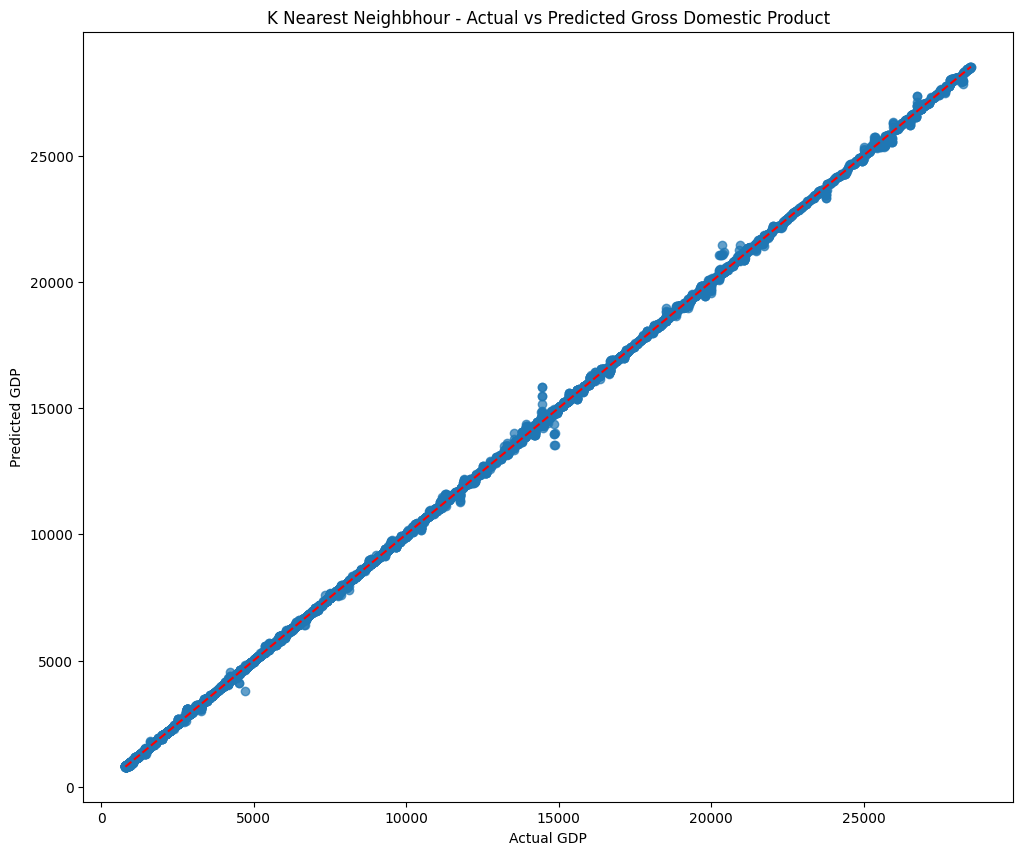

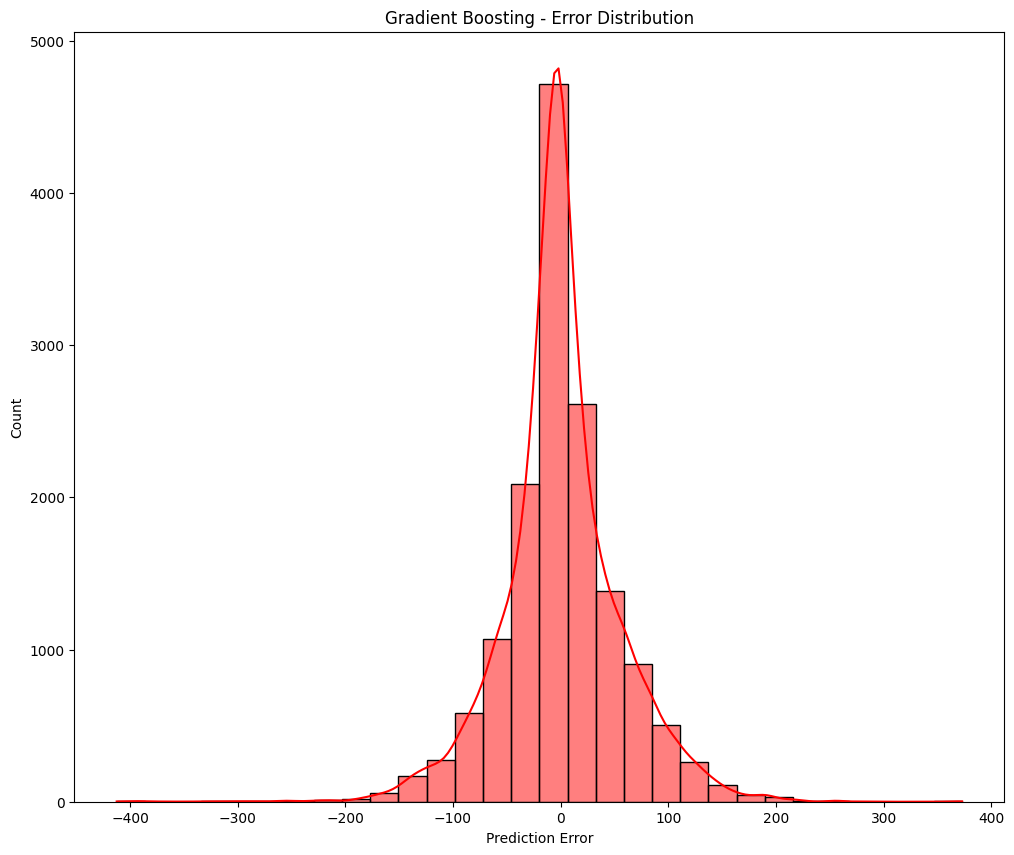

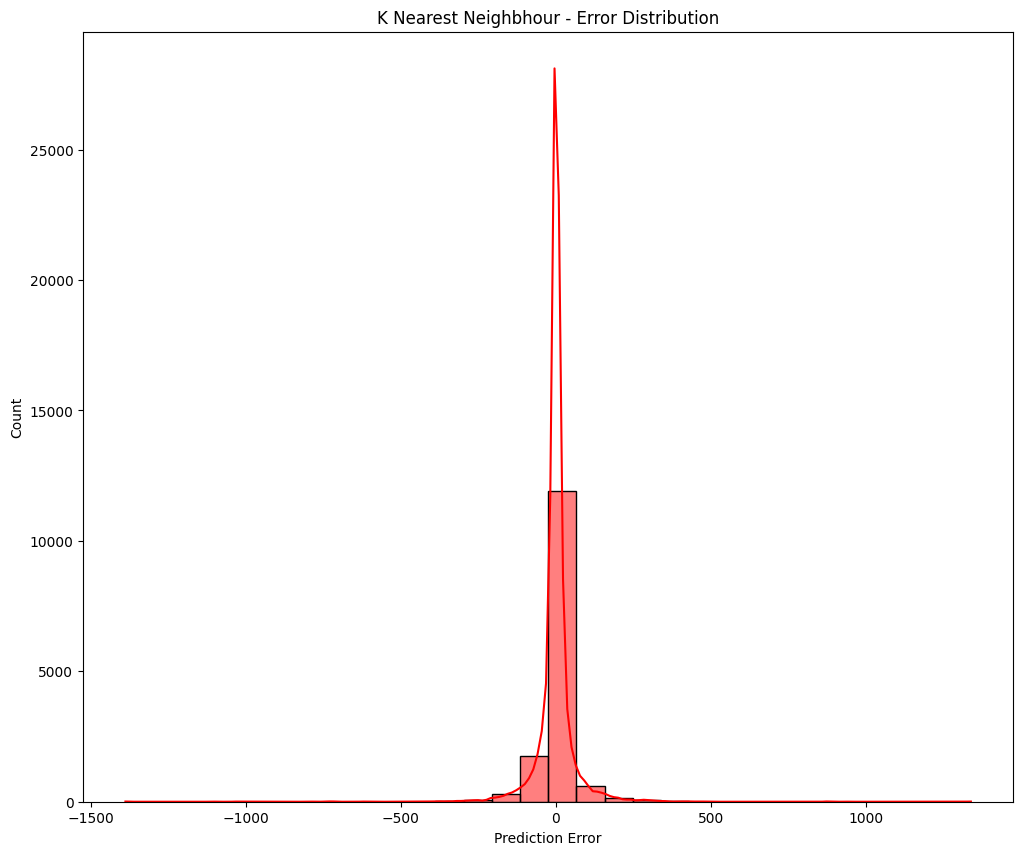

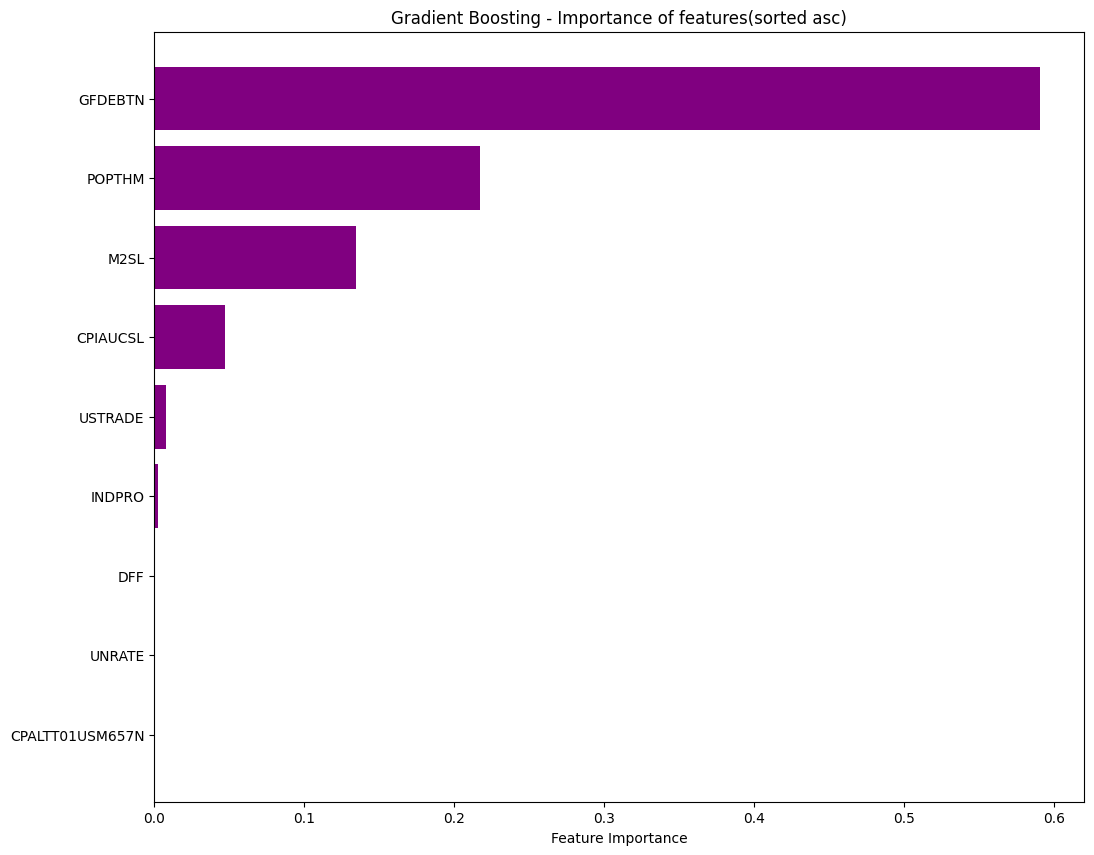

In [6]:

def predictions_vs_actuals_gdp(y_test, predictions, model_name):
    plt.figure(figsize=(12,10))
    plt.scatter(y_test, predictions, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual GDP')
    plt.ylabel('Predicted GDP')
    plt.title(f'{model_name} - Actual vs Predicted Gross Domestic Product')
    plt.show()


predictions_vs_actuals_gdp(y_test, gb_prediction, 'Gradient Boosting')


predictions_vs_actuals_gdp(y_test, knn_prediction, 'K Nearest Neighbhour')

def error_distribution(y_test, predictions, model_name):
    errors = y_test - predictions
    plt.figure(figsize=(12,10))
    sns.histplot(errors, kde=True, bins=30, color='red')
    plt.xlabel('Prediction Error')
    plt.title(f'{model_name} - Error Distribution')
    plt.show()


error_distribution(y_test, gb_prediction, 'Gradient Boosting')
error_distribution(y_test, knn_prediction, 'K Nearest Neighbhour')


def feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    index_sorting = np.argsort(feature_importance)
    plt.figure(figsize=(12,10))
    plt.barh(np.array(feature_names)[index_sorting], feature_importance[index_sorting], color='purple')
    plt.xlabel('Feature Importance')
    plt.title('Gradient Boosting - Importance of features(sorted asc)')
    plt.show()
feature_importance(gradient_boosting, features.columns)
